#CMTH642 - Data Analytics: Advanced Methods
#Assignment 3 (10%)
Ann Sam

Section DHA - Student #501160843

Due on June 16, 20222 11:30 PM

In [1]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
wine_red = pd.read_csv("winequality-red.csv", sep=";")
wine_wht = pd.read_csv("winequality-white.csv", sep=";")

Question 1: Join the red wine and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all. (2 points)

In [5]:
wine_data_all = pd.DataFrame(pd.concat([wine_red, wine_wht]))
print(wine_data_all.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Quesiton 2: Check the datatypes of the attributes. (2 points)

In [6]:
print(wine_data_all.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Question 3: Are there any missing values in the dataset? (2 points)

In [7]:
wine_data_all.info()
wine_data_all.isna().any().any()
wine_data_all.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


False

*There are no missing values in the dataset* 

Question 4: What is the correlation between the attributes other than Quality? (8 points)

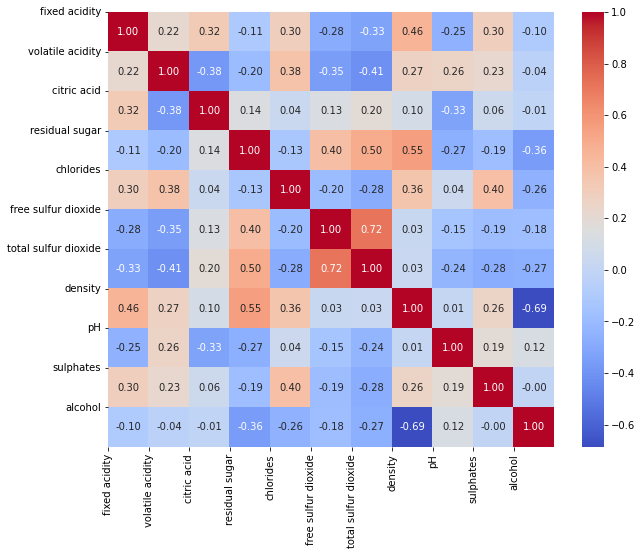

In [8]:
pred_var = wine_data_all.drop("quality", axis=1)
corrMatrix = pred_var.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sn.heatmap(corrMatrix, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corrMatrix.columns)), corrMatrix.columns);
plt.yticks(range(len(corrMatrix.columns)), corrMatrix.columns)

plt.show()

*There are correlations between:*


*   Strong positive correlation between Total Sulfur Dioxide and Free Sulfur Dioxide
*   Moderate positive correlation between Density and Residual Sugar
*   Moderate negative correlation between Density and Alcohol





Question 5: Graph the frequency distribution of wine quality by using Quality. (8 points)

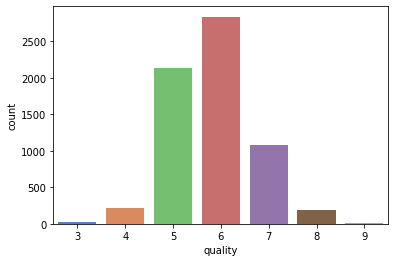

In [9]:
sn.countplot(x='quality', data=wine_data_all, palette='muted')

Question 6: Reduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)

In [10]:
wine_data_all['quality'] = wine_data_all.quality.apply(lambda q: 0 if q <= 4 else 1 if q <= 6 else 2)

In [11]:
wine_data_all.quality.value_counts()

1    4974
2    1277
0     246
Name: quality, dtype: int64

Question 7: Normalize the numeric attributes. (10 points)

In [12]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
wine_data_all.iloc[:, :-1] = minmax.fit_transform(wine_data_all.iloc[:, :-1])

In [13]:
wine_data_all.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,1.158689
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.457456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


Question 8: Prepare an exploratory data analysis question (without using predictions) about the dataset. Write a code to answer your question. Visualize your answer. (Your question should be related to at least three attributes in the dataset) (10 points)

*EDA Question: Deal with any outliers in the dataset and determine correlation between the attributes and the class variable Quality*

In [14]:
df_eda = wine_data_all.copy()

standard_deviations = 3
df_eda = df_eda[df_eda.apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]


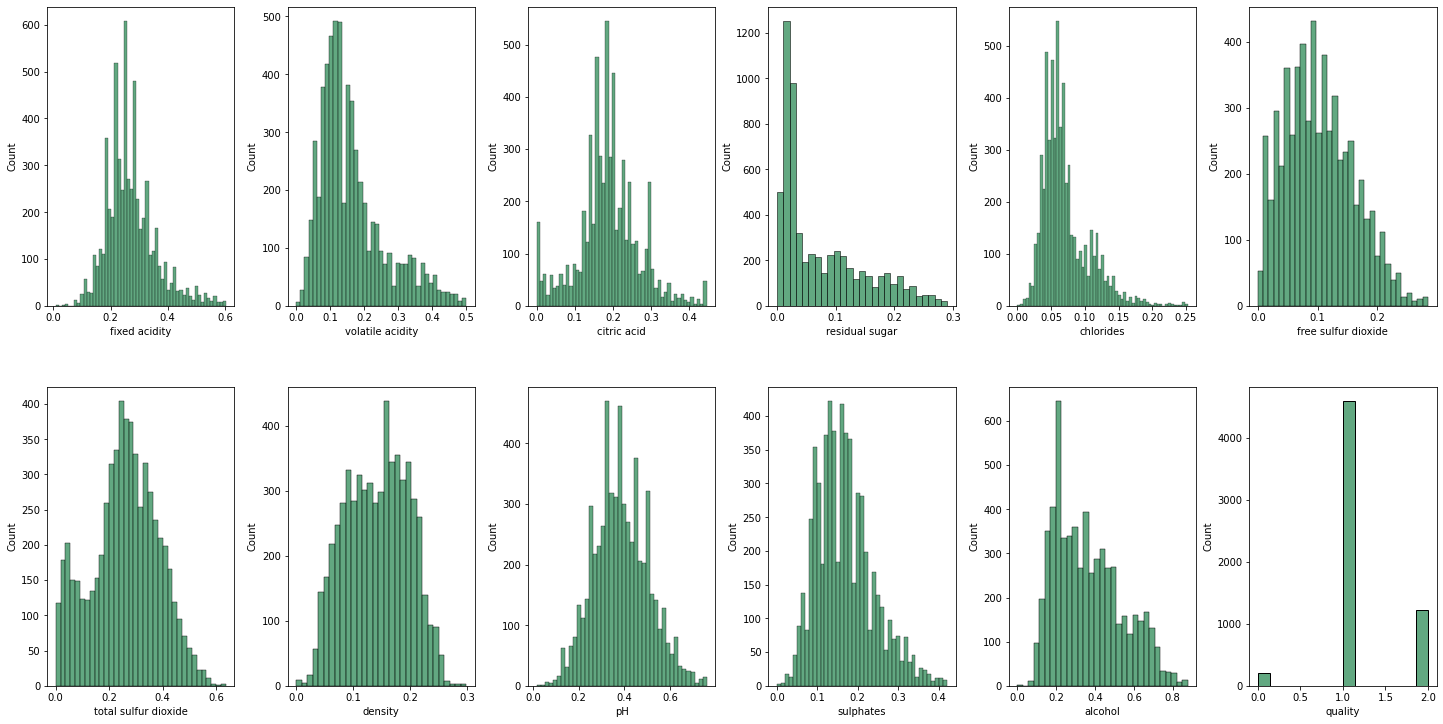

In [15]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_eda.items():
    sn.histplot(value, color='seagreen', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

*After removing data points that were more than 3 standard deviations (outliers), we can see that the distribution of plots of the parameters are still relatively normal or slightly right skewed.*

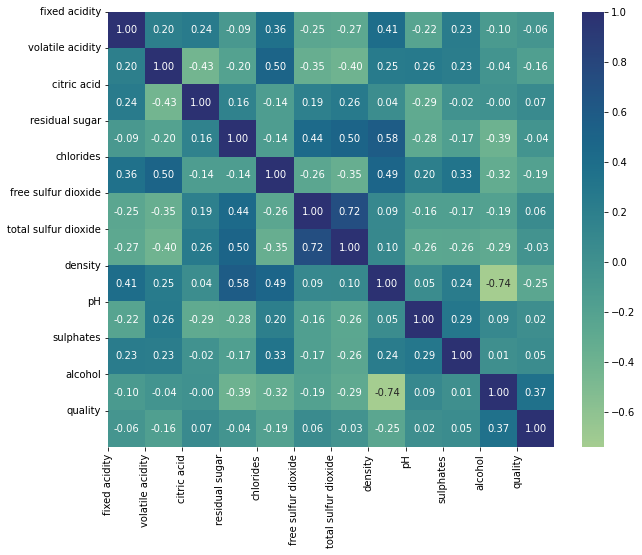

In [16]:
corrMatrix3 = df_eda.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sn.heatmap(corrMatrix3, cmap='crest', annot=True, fmt=".2f")

plt.xticks(range(len(corrMatrix3.columns)), corrMatrix3.columns);
plt.yticks(range(len(corrMatrix3.columns)), corrMatrix3.columns)

plt.show()

*The correlation heat map also is relatively similar with just stronger values for the already identified parameters mentioned in question 4.*

In [17]:
def FunctionAnova(inpData, TargetVariable, attributeList):
    from scipy.stats import f_oneway

    SelectedPredictors=[]
    
    for predictor in attributeList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If p-value <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, ', P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
attributeColList = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',
                    'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']

FunctionAnova(inpData=df_eda, TargetVariable='quality', attributeList=attributeColList)

fixed acidity is correlated with quality , P-Value: 2.3521682512817127e-05
volatile acidity is correlated with quality , P-Value: 1.3325546849516537e-36
citric acid is correlated with quality , P-Value: 1.8361234865791183e-07
residual sugar is correlated with quality , P-Value: 5.082288594430443e-09
chlorides is correlated with quality , P-Value: 7.38608821698991e-59
free sulfur dioxide is correlated with quality , P-Value: 1.2498502640024187e-19
total sulfur dioxide is correlated with quality , P-Value: 8.290798136359101e-07
density is correlated with quality , P-Value: 7.106736440868318e-113
pH is NOT correlated with quality , P-Value: 0.14245643128518617
sulphates is correlated with quality , P-Value: 8.11202206182809e-06
alcohol is correlated with quality , P-Value: 1.4611797093435664e-216


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

*Using ANOVA we can see that pH is not considered correlated with Quality. This attribute can be dropped to test in a filtered data set to determine if it will increase the prediction of quality when comparing the evaluation matrix*

Question 9: Divide the dataset to training and test sets. (12 points)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [19]:
X = wine_data_all.iloc[:, :-1]
y = wine_data_all.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)

(4547, 11)
(1950, 11)


Question 10: Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)

In [20]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[1 1 2 ... 2 1 1]


Question 11: Display the confusion matrix to evaluate the model performance. (12 points)

In [21]:
print(confusion_matrix(y_test, y_pred))

[[   6   70    2]
 [  11 1362  134]
 [   1  178  186]]


Question 12: Evaluate the model performance by computing Accuracy, Precision and Recall. (12 points)

In [22]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="micro")
rec = recall_score(y_test, y_pred, average="micro")

results = pd.DataFrame([['KNN Algorithm', acc, prec, rec]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])
print(results)

           Model  Accuracy  Precision    Recall
0  KNN Algorithm  0.796923   0.796923  0.796923
